In [27]:
!pip install psaw praw pandas vaderSentiment matplotlib

     |████████████████████████████████| 125 kB 752 kB/s eta 0:00:01


# Authenticate with Reddit:

In [29]:
import praw

reddit = praw.Reddit(
    client_id="lMYhh7BNAjLrJQ_c7v0M5w",
    client_secret="Mq0R3nUw3FxCmfnqcLM4sIrLA1_dzg",
    user_agent="your_user_agent"
)


In [31]:
import praw
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt



# Initialize VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Define date ranges for before, during, and after the Olympics
before_olympics_start = datetime(2024, 7, 1)
during_olympics_start = datetime(2024, 7, 26)
during_olympics_end = datetime(2024, 8, 11)
after_olympics_start = datetime(2024, 8, 12)


In [32]:
# Define subreddits and keywords
subreddits = ["politics", "travel", "france", "europe", "olympics"]
keywords = ["Paris", "Olympics", "Paris 2024"]

# Function to fetch posts in each period
def fetch_posts(subreddit_name, start_date, end_date, keywords, limit=1000):
    posts = []
    subreddit = reddit.subreddit(subreddit_name)

    # Search for posts containing keywords in the subreddit
    for keyword in keywords:
        for submission in subreddit.search(keyword, sort="new", limit=limit):
            # Filter posts by date
            post_date = datetime.fromtimestamp(submission.created_utc)
            if start_date <= post_date <= end_date:
                posts.append({
                    "user_id": submission.author.name if submission.author else None,
                    "subreddit": subreddit_name,
                    "post_text": submission.selftext,
                    "post_date": post_date,
                    "title": submission.title,
                    "upvotes": submission.score,
                    "comments": submission.num_comments
                })
    return posts

# Collect posts for each period
before_olympics_posts = []
during_olympics_posts = []
after_olympics_posts = []

for subreddit in subreddits:
    before_olympics_posts.extend(fetch_posts(subreddit, before_olympics_start, during_olympics_start, keywords))
    during_olympics_posts.extend(fetch_posts(subreddit, during_olympics_start, during_olympics_end, keywords))
    after_olympics_posts.extend(fetch_posts(subreddit, after_olympics_start, datetime.now(), keywords))

# Convert to DataFrames
before_df = pd.DataFrame(before_olympics_posts)
during_df = pd.DataFrame(during_olympics_posts)
after_df = pd.DataFrame(after_olympics_posts)


In [36]:
before_df

,user_id,subreddit,post_text,post_date,title,upvotes,comments,sentiment
0,Schiffy94,politics,,2024-07-22 16:47:32,Newt Gingrich Wins Doofus Gold Medal For Take ...,69,30,0.0
1,don_caveuto,politics,,2024-07-12 19:22:11,First lady Dr. Jill Biden to lead US delegatio...,0,29,0.0
2,lala_b11,politics,,2024-07-25 23:38:52,Steph Curry praises Kamala Harris and hopes US...,859,69,0.0
3,Schiffy94,politics,,2024-07-22 16:47:32,Newt Gingrich Wins Doofus Gold Medal For Take ...,66,30,0.0
4,don_caveuto,politics,,2024-07-12 19:22:11,First lady Dr. Jill Biden to lead US delegatio...,0,29,0.0
...,...,...,...,...,...,...,...,...
170,LeMonde_en,europe,,2024-07-19 18:34:53,Paris 2024: QR codes and anti-terror zones tra...,9,2,0.0
171,TheMirrorUS,europe,,2024-07-17 22:14:11,Paris Mayor takes plunge in Seine to prove poo...,0,3,0.0
172,LeMonde_en,europe,,2024-07-17 14:29:35,Video: How Paris made the Seine swimmable for ...,10,9,0.0
173,Similar_Diver9558,europe,,2024-07-17 09:08:12,Are Tourists Really Fleeing Paris ahead of the...,1,1,0.0


In [37]:
during_df

,user_id,subreddit,post_text,post_date,title,upvotes,comments,sentiment
0,Murky-Site7468,politics,,2024-08-02 19:47:55,Simone Biles Deserves Another Gold for Apparen...,486,20,0.0
1,Emily_and_Me,politics,,2024-07-28 05:30:20,US and world leaders denounce Paris Olympics o...,0,103,0.0
2,newzee1,politics,,2024-08-06 03:37:20,"White House, Harris silent on Olympics gender ...",0,167,0.0
3,willywalloo,politics,,2024-08-02 17:33:09,'I love my black job': Simone Biles appears to...,1885,73,0.0
4,aldotcom,politics,,2024-08-02 16:47:53,"Tuberville, Britt call Olympic boxer a man, li...",0,171,0.0
...,...,...,...,...,...,...,...,...
200,LeMonde_en,europe,,2024-07-27 12:12:21,Video. Paris 2024: Watch the opening ceremony'...,0,8,0.0
201,TheTelegraph,europe,,2024-07-26 21:48:04,Pictured: King Felipe VI and Queen Letizia bra...,0,16,0.0
202,LeMonde_en,europe,,2024-07-26 19:59:48,Paris 2024: Interactive map of the opening cer...,7,0,0.0
203,LeMonde_en,europe,,2024-07-26 18:09:57,Paris 2024 live: Follow the opening ceremony o...,0,0,0.0


In [38]:
after_df

,user_id,subreddit,post_text,post_date,title,upvotes,comments,sentiment
0,ILikeNeurons,politics,,2024-11-03 14:50:52,A second US exit could ‘cripple’ the Paris cli...,287,8,0.0000
1,teamworldunity,politics,,2024-10-23 16:40:55,Paris bargoers choose next U.S. president in s...,5,3,0.0000
2,aslan_is_on_the_move,politics,,2024-08-13 20:56:45,Mayor Bass Becomes First Black Woman Mayor to ...,42,4,0.0000
3,TimesandSundayTimes,politics,"Edit: We're done for the day, thanks for joini...",2024-11-07 19:16:53,What will the new Trump presidency mean for th...,54,194,0.5778
4,TheTelegraph,politics,,2024-11-06 18:15:59,Donald Trump and Olympics on collision course ...,63,82,0.0000
...,...,...,...,...,...,...,...,...
1401,stolenambulance,olympics,,2024-08-13 14:54:53,How was your country's broadcast of the Paris ...,18,52,0.0000
1402,EMMAaustengirl,olympics,"I've seen a lot of The Thrill Of Victory, but ...",2024-08-13 13:34:52,Paris Olympics 2024 What were some Agony of D...,2,17,-0.7622
1403,Gobblemegood,olympics,Is this true?? There is only 1% gold in the Ol...,2024-08-13 13:29:59,Is this true?? There is only 1% gold in the Ol...,18,27,0.7738
1404,gardenmadman,olympics,,2024-08-13 10:42:58,Well done to all those who took part and made ...,11,0,0.0000


In [34]:
# Function to calculate sentiment score
def calculate_sentiment(text):
    score = analyzer.polarity_scores(text)
    return score['compound']  # Use compound score for general sentiment

# Add sentiment scores for each period
before_df['sentiment'] = before_df['post_text'].apply(calculate_sentiment)
during_df['sentiment'] = during_df['post_text'].apply(calculate_sentiment)
after_df['sentiment'] = after_df['post_text'].apply(calculate_sentiment)


Average sentiment before Olympics: 0.066572
Average sentiment during Olympics: 0.03597756097560975
Average sentiment after Olympics: 0.2777470128022759


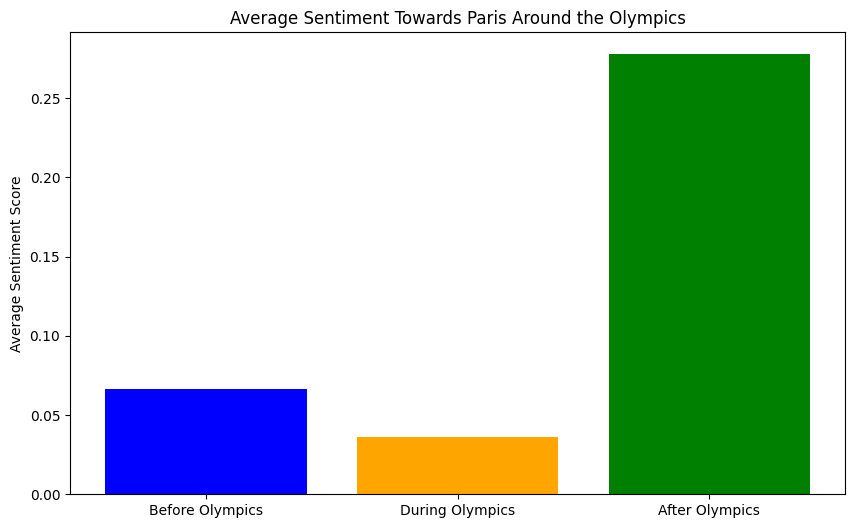

In [35]:
# Calculate average sentiment for each period
average_before_sentiment = before_df['sentiment'].mean()
average_during_sentiment = during_df['sentiment'].mean()
average_after_sentiment = after_df['sentiment'].mean()

# Print results
print(f"Average sentiment before Olympics: {average_before_sentiment}")
print(f"Average sentiment during Olympics: {average_during_sentiment}")
print(f"Average sentiment after Olympics: {average_after_sentiment}")

# Plot sentiment over time
plt.figure(figsize=(10, 6))
plt.bar(["Before Olympics", "During Olympics", "After Olympics"],
        [average_before_sentiment, average_during_sentiment, average_after_sentiment],
        color=['blue', 'orange', 'green'])
plt.title("Average Sentiment Towards Paris Around the Olympics")
plt.ylabel("Average Sentiment Score")
plt.show()
